In [70]:
#importing Data-set

import pandas as pd

df=pd.read_csv("/Users/arsh/Documents/code/Programs/AI/Project/m1.csv")
df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [62]:
df.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [71]:
#normalising data

from sklearn.preprocessing import LabelEncoder

df['title']=LabelEncoder().fit_transform(df['title'])
df['genres']=LabelEncoder().fit_transform(df['genres'])


#scaling

from sklearn.preprocessing import StandardScaler
df=StandardScaler().fit_transform(df)
df

array([[-1.93188745,  1.4366622 , -1.0128075 ],
       [-1.93187164, -0.2570899 , -0.79818112],
       [-1.93185584, -0.56228097,  0.39129031],
       ...,
       [ 1.3742774 , -1.45317657,  0.18268149],
       [ 1.37437224, -1.67021739, -2.20428479],
       [ 1.37440385,  1.66932107, -1.91945352]])

In [72]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=10,init='k-means++',n_init=100)
model.fit(df)

KMeans(n_clusters=10, n_init=100)

In [73]:
labels=model.labels_

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

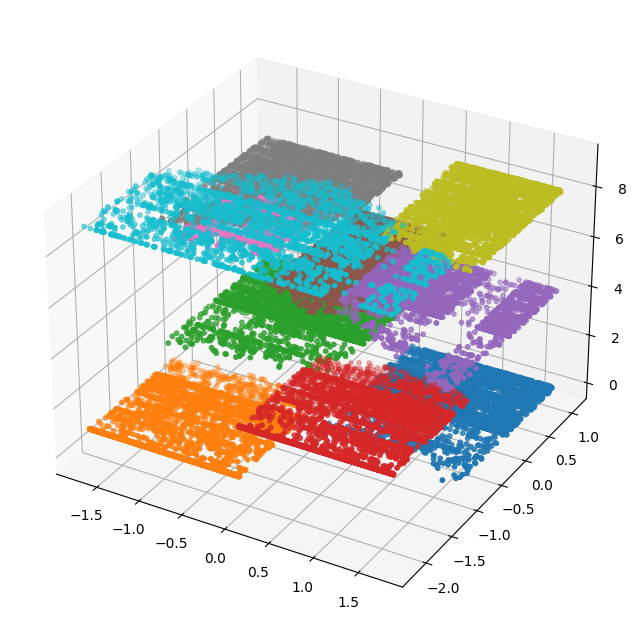

In [79]:
# Create a 3D scatter plot

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for label in range(10):
    ax.scatter(df[labels==label,1],
             df[labels==label, 2],
             label,



             s=10
            )



# Animation update function
def update(angle):
    ax.view_init(elev=10, azim=angle)  # Update the viewing angle


from matplotlib.animation import FuncAnimation
# Create the animation
animation = FuncAnimation(fig, update, frames=np.arange(0, 360, 5), interval=50)


plt.show()